## Webscraping Exercise

The purpose of this exercise is to use *beautifulsoup* to extract out information from this article: https://www.usatoday.com/story/money/business/2018/09/13/mcdonalds-states-most-stores/37748287/.

Unfortunately, the information we want is not stored in a table and is not formatted in a way that makes it easy to extract, so it will take some work before you can do any analysis.

Your objective is to create a pandas DataFrame containing all 50 states and the four metrics from the article (number of McDonald's per 100,000, adult obesity rate, percent consuming vegetables less than daily, and median household income).

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 500)

**Step 1: Use _requests_ to fetch the contents of the article and convert to soup with _BeautifulSoup_**

In [2]:
# Your code here
url = 'https://www.usatoday.com/story/money/business/2018/09/13/mcdonalds-states-most-stores/37748287/'
response = requests.get(url)

### Step 2: Extract State Names

**A.** Using whatever method you would like, extract out the states as a list named `states`. Do this in the same order that they appear in the article.

In [3]:
# Your code here
soup = bs(response.text)

**B.** Now, extract the other four variables as lists named `McD`, `obesity`, `veggies`, and `income`. Make sure that they are in the same order as states.

In [4]:
# Your code here
print(soup.prettify())

<!DOCTYPE html>
<html class="gnt__njs" lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="#0098FE" name="theme-color"/>
  <title>
   McDonald's lover? Here are the states with the most stores
  </title>
  <meta content="Is your state 'lovin' it'? A look at where the most McDonald's are located in the US" property="og:title"/>
  <link href="https://amp.usatoday.com/amp/37748287" rel="amphtml"/>
  <meta content="Colman Andrews" property="article:author"/>
  <meta content="metered" property="article:content_tier"/>
  <meta content="false" property="article:opinion"/>
  <link href="//user.usatoday.com" rel="dns-prefetch"/>
  <link href="https://user.usatoday.com" rel="preconnect"/>
  <link href="//content-static.gannett.com" rel="dns-prefetch"/>
  <link href="//www.gannett-cdn.com" rel="dns-prefetch"/>
  <link href="//securepubads.g.doubleclick.net" rel="dns-prefetch"/>
  <link href="https:

In [5]:
#h3 class="gnt_ar_b_h2"
soup.find_all('h3', attrs={'class' : "gnt_ar_b_h2"})[0:50]

[<h3 class="gnt_ar_b_h2">50. Rhode Island</h3>,
 <h3 class="gnt_ar_b_h2">49. New Jersey</h3>,
 <h3 class="gnt_ar_b_h2">48. New York</h3>,
 <h3 class="gnt_ar_b_h2">47. California</h3>,
 <h3 class="gnt_ar_b_h2">46. North Dakota</h3>,
 <h3 class="gnt_ar_b_h2">45. South Dakota</h3>,
 <h3 class="gnt_ar_b_h2">44. Massachusetts</h3>,
 <h3 class="gnt_ar_b_h2">43. Washington</h3>,
 <h3 class="gnt_ar_b_h2">42. Idaho</h3>,
 <h3 class="gnt_ar_b_h2">41. Utah</h3>,
 <h3 class="gnt_ar_b_h2">40. Colorado</h3>,
 <h3 class="gnt_ar_b_h2">39. Pennsylvania</h3>,
 <h3 class="gnt_ar_b_h2">38. Delaware</h3>,
 <h3 class="gnt_ar_b_h2">37. Connecticut</h3>,
 <h3 class="gnt_ar_b_h2">36. Oregon</h3>,
 <h3 class="gnt_ar_b_h2">35. New Hampshire</h3>,
 <h3 class="gnt_ar_b_h2">34. Minnesota</h3>,
 <h3 class="gnt_ar_b_h2">33. Nebraska</h3>,
 <h3 class="gnt_ar_b_h2">32. Arizona</h3>,
 <h3 class="gnt_ar_b_h2">31. Vermont</h3>,
 <h3 class="gnt_ar_b_h2">30. Alaska</h3>,
 <h3 class="gnt_ar_b_h2">29. Texas</h3>,
 <h3 class="

In [6]:
for a in soup.find_all('h3', attrs={'class' : "gnt_ar_b_h2"})[0:50]:
  print(a.string)

50. Rhode Island
49. New Jersey
48. New York
47. California
46. North Dakota
45. South Dakota
44. Massachusetts
43. Washington
42. Idaho
41. Utah
40. Colorado
39. Pennsylvania
38. Delaware
37. Connecticut
36. Oregon
35. New Hampshire
34. Minnesota
33. Nebraska
32. Arizona
31. Vermont
30. Alaska
29. Texas
28. Florida
27. Georgia
26. Montana
25. South Carolina
24. Maine
23. Virginia
22. Iowa
21. North Carolina
20. Maryland
19. Nevada
18. Mississippi
17. Tennessee
16. New Mexico
15. Wyoming
14. Alabama
13. Kansas
12. Louisiana
11. Missouri
10. Wisconsin
9. Hawaii
8. Illinois
7. Oklahoma
6. Indiana
5. Ohio
4. Michigan
3. Kentucky
2. West Virginia
1. Arkansas


In [7]:
type(a)

bs4.element.Tag

In [8]:
states = []
for a in soup.find_all('h3', attrs={'class' : "gnt_ar_b_h2"})[0:50]:
    states.append(a.string)
print(states)

['50. Rhode Island', '49. New Jersey', '48. New York', '47. California', '46. North Dakota', '45. South Dakota', '44. Massachusetts', '43. Washington', '42. Idaho', '41. Utah', '40. Colorado', '39. Pennsylvania', '38. Delaware', '37. Connecticut', '36. Oregon', '35. New Hampshire', '34. Minnesota', '33. Nebraska', '32. Arizona', '31. Vermont', '30. Alaska', '29. Texas', '28. Florida', '27. Georgia', '26. Montana', '25. South Carolina', '24. Maine', '23. Virginia', '22. Iowa', '21. North Carolina', '20. Maryland', '19. Nevada', '18. Mississippi', '17. Tennessee', '16. New Mexico', '15. Wyoming', '14. Alabama', '13. Kansas', '12. Louisiana', '11. Missouri', '10. Wisconsin', '9. Hawaii', '8. Illinois', '7. Oklahoma', '6. Indiana', '5. Ohio', '4. Michigan', '3. Kentucky', '2. West Virginia', '1. Arkansas']


In [9]:
type(states)

list

Break 'variables' down into 4 lists: McD, obesity, veggies, and income

In [10]:
McD_ext = re.findall(r"(No\.\sof\sMcDonald\'s\:\<\/strong\>\s\d+.\d+)", str(soup))
print(McD_ext)

["No. of McDonald's:</strong> 2.9", "No. of McDonald's:</strong> 3.0", "No. of McDonald's:</strong> 3.1", "No. of McDonald's:</strong> 3.3", "No. of McDonald's:</strong> 3.3", "No. of McDonald's:</strong> 3.4", "No. of McDonald's:</strong> 3.5", "No. of McDonald's:</strong> 3.6", "No. of McDonald's:</strong> 3.6", "No. of McDonald's:</strong> 3.7", "No. of McDonald's:</strong> 3.8", "No. of McDonald's:</strong> 3.9", "No. of McDonald's:</strong> 4.0", "No. of McDonald's:</strong> 4.0", "No. of McDonald's:</strong> 4.0", "No. of McDonald's:</strong> 4.0", "No. of McDonald's:</strong> 4.1", "No. of McDonald's:</strong> 4.1", "No. of McDonald's:</strong> 4.1", "No. of McDonald's:</strong> 4.2", "No. of McDonald's:</strong> 4.2", "No. of McDonald's:</strong> 4.2", "No. of McDonald's:</strong> 4.3", "No. of McDonald's:</strong> 4.4", "No. of McDonald's:</strong> 4.6", "No. of McDonald's:</strong> 4.6", "No. of McDonald's:</strong> 4.6", "No. of McDonald's:</strong> 4.7", "No. of McDonald's:

In [11]:
McD = re.findall(r"(\d+.\d+)", str(McD_ext))
print(McD)

['2.9', '3.0', '3.1', '3.3', '3.3', '3.4', '3.5', '3.6', '3.6', '3.7', '3.8', '3.9', '4.0', '4.0', '4.0', '4.0', '4.1', '4.1', '4.1', '4.2', '4.2', '4.2', '4.3', '4.4', '4.6', '4.6', '4.6', '4.7', '4.7', '4.8', '4.8', '4.8', '4.9', '4.9', '5.0', '5.0', '5.0', '5.1', '5.1', '5.2', '5.2', '5.2', '5.2', '5.2', '5.2', '5.3', '5.5', '5.7', '5.7', '5.8']


In [12]:
type(McD)

list

In [13]:
obesity_ext = re.findall(r"(Adult\sobesity\srate:\<\/strong\>\s\d+.\d+)", str(soup))
obesity = re.findall(r"(\d+.\d+)", str(obesity_ext))
print(obesity)

['27.2', '25.9', '25.0', '22.7', '31.8', '30.6', '24.3', '27.0', '28.6', '25.3', '20.5', '29.6', '30.6', '25.2', '27.2', '27.9', '27.3', '30.7', '26.7', '24.7', '29.4', '28.4', '25.9', '30.2', '25.0', '32.0', '29.0', '28.3', '31.8', '29.6', '29.2', '26.8', '35.3', '32.4', '24.4', '28.5', '34.7', '32.4', '34.7', '31.8', '30.6', '22.3', '28.0', '33.2', '32.0', '31.6', '31.3', '33.7', '35.5', '34.6']


In [14]:
type(obesity)

list

In [15]:
veggies_ext = re.findall(r"(vegetables\sless\sthan\sdaily:\<\/strong\>\s\d+.\d+)", str(soup))
veggies = re.findall(r"(\d+.\d+)", str(veggies_ext))
print(veggies)

['23.5', '22.1', '22.4', '18.6', '27.5', '26.1', '18.3', '16.9', '18.6', '20.0', '17.8', '24.2', '20.7', '19.5', '16.5', '17.3', '22.4', '24.7', '20.5', '17.6', '18.9', '19.5', '21.3', '24.7', '19.3', '25.4', '18.3', '21.7', '26.9', '21.6', '21.3', '19.2', '31.2', '22.6', '21.5', '21.5', '27.8', '22.3', '31.0', '23.3', '24.0', '21.4', '24.3', '24.5', '26.7', '24.7', '24.7', '24.6', '26.5', '28.1']


In [16]:
type(veggies)


list

In [17]:
income_ext = re.findall(r"(income\:\<\/strong\>\s\$\d+\,\d+)", str(soup))
income = re.findall(r"(\d+,\d+)", str(income_ext))
print(income)

['60,596', '76,126', '62,909', '67,739', '60,656', '54,467', '75,297', '67,106', '51,807', '65,977', '65,685', '56,907', '61,757', '73,433', '57,532', '70,936', '65,599', '56,927', '53,558', '57,677', '76,440', '56,565', '50,860', '53,559', '50,027', '49,501', '53,079', '68,114', '56,247', '50,584', '78,945', '55,180', '41,754', '48,547', '46,748', '59,882', '46,257', '54,935', '45,146', '51,746', '56,811', '74,511', '60,960', '49,176', '52,314', '52,334', '52,492', '46,659', '43,385', '44,334']


In [18]:
type(income)

list

### Step 3: Convert the Result to a pandas DataFrame

Once you have created a DataFrame, take a look at the results and see if there are any significant correlations between the variables.

In [19]:
# Convert to dataframe by setting up an empty df and passing the variables through as columns
usat_mcd = pd.DataFrame()
usat_mcd['state'] = states
usat_mcd['McDs'] = McD
usat_mcd['obesity'] = obesity
usat_mcd['veggies'] = veggies
usat_mcd['income'] = income

print(usat_mcd)

                 state McDs obesity veggies  income
0     50. Rhode Island  2.9    27.2    23.5  60,596
1       49. New Jersey  3.0    25.9    22.1  76,126
2         48. New York  3.1    25.0    22.4  62,909
3       47. California  3.3    22.7    18.6  67,739
4     46. North Dakota  3.3    31.8    27.5  60,656
5     45. South Dakota  3.4    30.6    26.1  54,467
6    44. Massachusetts  3.5    24.3    18.3  75,297
7       43. Washington  3.6    27.0    16.9  67,106
8            42. Idaho  3.6    28.6    18.6  51,807
9             41. Utah  3.7    25.3    20.0  65,977
10        40. Colorado  3.8    20.5    17.8  65,685
11    39. Pennsylvania  3.9    29.6    24.2  56,907
12        38. Delaware  4.0    30.6    20.7  61,757
13     37. Connecticut  4.0    25.2    19.5  73,433
14          36. Oregon  4.0    27.2    16.5  57,532
15   35. New Hampshire  4.0    27.9    17.3  70,936
16       34. Minnesota  4.1    27.3    22.4  65,599
17        33. Nebraska  4.1    30.7    24.7  56,927
18         3

In [20]:
# I want to make 'state' the index and remove the row count on the left.  
usat_mcd_stateidx = usat_mcd.set_index('state')
print(usat_mcd_stateidx)

                   McDs obesity veggies  income
state                                          
50. Rhode Island    2.9    27.2    23.5  60,596
49. New Jersey      3.0    25.9    22.1  76,126
48. New York        3.1    25.0    22.4  62,909
47. California      3.3    22.7    18.6  67,739
46. North Dakota    3.3    31.8    27.5  60,656
45. South Dakota    3.4    30.6    26.1  54,467
44. Massachusetts   3.5    24.3    18.3  75,297
43. Washington      3.6    27.0    16.9  67,106
42. Idaho           3.6    28.6    18.6  51,807
41. Utah            3.7    25.3    20.0  65,977
40. Colorado        3.8    20.5    17.8  65,685
39. Pennsylvania    3.9    29.6    24.2  56,907
38. Delaware        4.0    30.6    20.7  61,757
37. Connecticut     4.0    25.2    19.5  73,433
36. Oregon          4.0    27.2    16.5  57,532
35. New Hampshire   4.0    27.9    17.3  70,936
34. Minnesota       4.1    27.3    22.4  65,599
33. Nebraska        4.1    30.7    24.7  56,927
32. Arizona         4.1    26.7    20.5 

In [21]:
#Note that 'state' is no longer listed as a column
usat_mcd_stateidx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 50. Rhode Island to 1. Arkansas
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   McDs     50 non-null     object
 1   obesity  50 non-null     object
 2   veggies  50 non-null     object
 3   income   50 non-null     object
dtypes: object(4)
memory usage: 2.0+ KB


In [22]:
# here is the original dataset which shows 'state' as a column
usat_mcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   state    50 non-null     object
 1   McDs     50 non-null     object
 2   obesity  50 non-null     object
 3   veggies  50 non-null     object
 4   income   50 non-null     object
dtypes: object(5)
memory usage: 2.1+ KB


In [23]:
# strip comma from income in order to convert to numeric
usat_mcd['income'] = usat_mcd['income'].replace(',', '', regex=True)
usat_mcd.head()

,state,McDs,obesity,veggies,income
0,50. Rhode Island,2.9,27.2,23.5,60596
1,49. New Jersey,3.0,25.9,22.1,76126
2,48. New York,3.1,25.0,22.4,62909
3,47. California,3.3,22.7,18.6,67739
4,46. North Dakota,3.3,31.8,27.5,60656


In [24]:
# convert all columns except state to integers
usat_mcd['McDs'] = pd.to_numeric(usat_mcd['McDs'])
usat_mcd['obesity'] = pd.to_numeric(usat_mcd['obesity'])
usat_mcd['veggies'] = pd.to_numeric(usat_mcd['veggies'])
usat_mcd['income'] = pd.to_numeric(usat_mcd['income'])
usat_mcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   state    50 non-null     object 
 1   McDs     50 non-null     float64
 2   obesity  50 non-null     float64
 3   veggies  50 non-null     float64
 4   income   50 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 2.1+ KB


In [25]:
usat_mcd.describe()

,McDs,obesity,veggies,income
count,50.000000,50.000000,50.000000,50.000000
mean,4.450000,29.028000,22.480000,57795.660000
std,0.755456,3.592739,3.568799,9597.945224
min,2.900000,20.500000,16.500000,41754.000000
25%,4.000000,26.725000,19.500000,51081.500000
50%,4.600000,29.100000,22.200000,56406.000000
75%,5.075000,31.800000,24.700000,64926.500000
max,5.800000,35.500000,31.200000,78945.000000


In [26]:
# look for any correlations between the variables, starting with McDonalds
usat_mcd.corr()

,McDs,obesity,veggies,income
McDs,1.000000,0.554462,0.424351,-0.531582
obesity,0.554462,1.000000,0.758545,-0.621258
veggies,0.424351,0.758545,1.000000,-0.551355
income,-0.531582,-0.621258,-0.551355,1.000000


## Summary: 

If the basis of the article is the impact of McDonald's on obesity, health and income; the strongest correlation appears to be between obesity and the presence of McDonalds.  But even then, it is a moderate positive correlation.  Income would be the second closest correlation showing a moderate negative relationship.  

However, the data does imply a strong positive correlation between obesity and not eating vegetables daily.  

Let's also look at some general sorting of the data.

In [27]:
# sort State income by values.  Note that I have to use the df where 'state' is the index 
usat_mcd_stateidx.income.sort_values()

state
18. Mississippi       41,754
2. West Virginia      43,385
1. Arkansas           44,334
12. Louisiana         45,146
14. Alabama           46,257
3. Kentucky           46,659
16. New Mexico        46,748
17. Tennessee         48,547
7. Oklahoma           49,176
25. South Carolina    49,501
26. Montana           50,027
21. North Carolina    50,584
28. Florida           50,860
11. Missouri          51,746
42. Idaho             51,807
6. Indiana            52,314
5. Ohio               52,334
4. Michigan           52,492
24. Maine             53,079
32. Arizona           53,558
27. Georgia           53,559
45. South Dakota      54,467
13. Kansas            54,935
19. Nevada            55,180
22. Iowa              56,247
29. Texas             56,565
10. Wisconsin         56,811
39. Pennsylvania      56,907
33. Nebraska          56,927
36. Oregon            57,532
31. Vermont           57,677
15. Wyoming           59,882
50. Rhode Island      60,596
46. North Dakota      60,656
8. Illin

Who would have thought Alaska has the 2nd highest median income?? 

In [28]:
#sort obesity rates by state 
usat_mcd_stateidx.obesity.sort_values()

state
40. Colorado          20.5
9. Hawaii             22.3
47. California        22.7
44. Massachusetts     24.3
16. New Mexico        24.4
31. Vermont           24.7
26. Montana           25.0
48. New York          25.0
37. Connecticut       25.2
41. Utah              25.3
49. New Jersey        25.9
28. Florida           25.9
32. Arizona           26.7
19. Nevada            26.8
43. Washington        27.0
50. Rhode Island      27.2
36. Oregon            27.2
34. Minnesota         27.3
35. New Hampshire     27.9
8. Illinois           28.0
23. Virginia          28.3
29. Texas             28.4
15. Wyoming           28.5
42. Idaho             28.6
24. Maine             29.0
20. Maryland          29.2
30. Alaska            29.4
21. North Carolina    29.6
39. Pennsylvania      29.6
27. Georgia           30.2
38. Delaware          30.6
45. South Dakota      30.6
10. Wisconsin         30.6
33. Nebraska          30.7
4. Michigan           31.3
5. Ohio               31.6
22. Iowa              

Southern states predominantly capture the highest rates of obesity

Now look at scatterplots to determine visual correlations between the data.

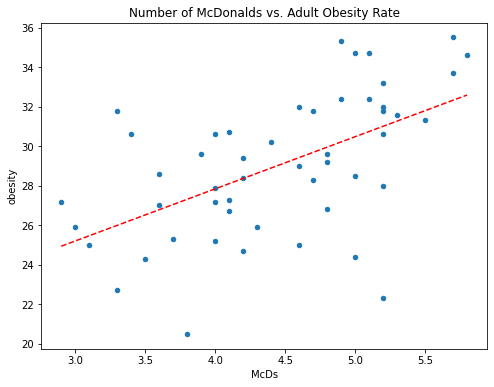

In [29]:
fig, ax = plt.subplots(figsize = (8,6))
usat_mcd.plot(kind = 'scatter', x = 'McDs', y = 'obesity', ax = ax)

x = np.linspace(usat_mcd['McDs'].min(), usat_mcd['McDs'].max(), 100)
z = np.polyfit(usat_mcd['McDs'], usat_mcd['obesity'], 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title('Number of McDonalds vs. Adult Obesity Rate');

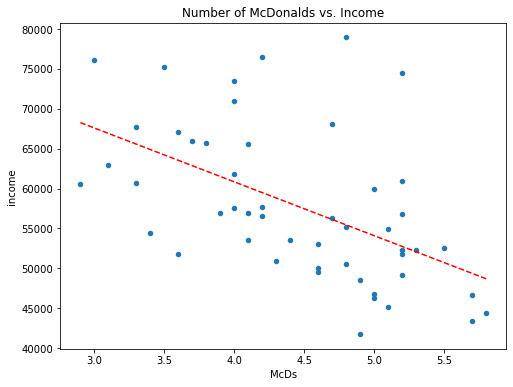

In [30]:
fig, ax = plt.subplots(figsize = (8,6))
usat_mcd.plot(kind = 'scatter', x = 'McDs', y = 'income', ax = ax)

x = np.linspace(usat_mcd['McDs'].min(), usat_mcd['McDs'].max(), 100)
z = np.polyfit(usat_mcd['McDs'], usat_mcd['income'], 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title('Number of McDonalds vs. Income');

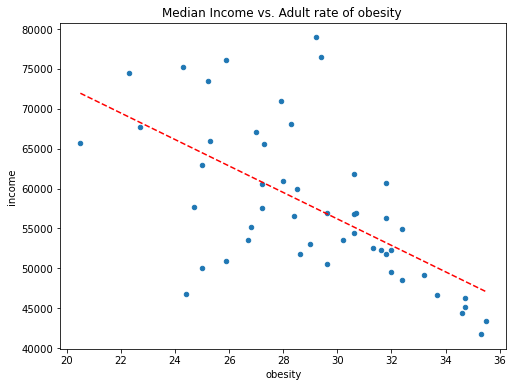

In [31]:
#look at relationship between income and obesity 
fig, ax = plt.subplots(figsize = (8,6))
usat_mcd.plot(kind = 'scatter', x = 'obesity', y = 'income', ax = ax)

x = np.linspace(usat_mcd['obesity'].min(), usat_mcd['obesity'].max(), 100)
z = np.polyfit(usat_mcd['obesity'], usat_mcd['income'], 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title('Median Income vs. Adult rate of obesity ');

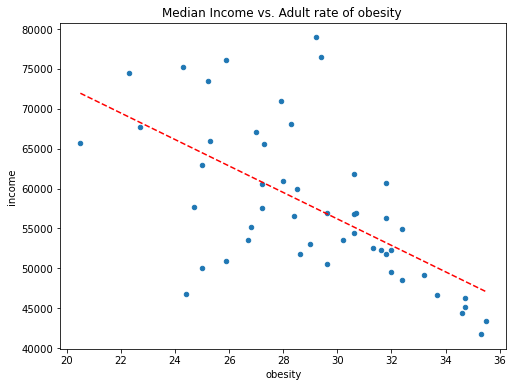

In [32]:
#look at relationship between income and obesity 
fig, ax = plt.subplots(figsize = (8,6))
usat_mcd.plot(kind = 'scatter', x = 'obesity', y = 'income', ax = ax)

x = np.linspace(usat_mcd['obesity'].min(), usat_mcd['obesity'].max(), 100)
z = np.polyfit(usat_mcd['obesity'], usat_mcd['income'], 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title('Median Income vs. Adult rate of obesity ');

The above scatter plot appears to mirror the correlation table's finding of a moderately strong, negative, correlation between increased obesity rates with lower levels of income

And finally, the plot showing the greatest level of correlation: decreased levels of eating vegetables and increased obesity

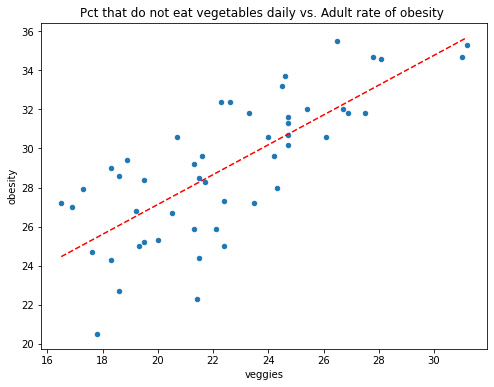

In [33]:
fig, ax = plt.subplots(figsize = (8,6))
usat_mcd.plot(kind = 'scatter', x = 'veggies', y = 'obesity', ax = ax)

x = np.linspace(usat_mcd['veggies'].min(), usat_mcd['veggies'].max(), 100)
z = np.polyfit(usat_mcd['veggies'], usat_mcd['obesity'], 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title('Pct that do not eat vegetables daily vs. Adult rate of obesity ');